<a href="https://colab.research.google.com/github/kartoone/cosc470s24/blob/main/examplecode/FastNeuralNetwork_sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The **Hello, world** of neural networks
This code builds a simple neural network that can recognize handwritten 28x28 pixel digits.

Our first version will have 15 neurons in the hidden layer and 10 output neurons.

See image below:
http://neuralnetworksanddeeplearning.com/images/tikz12.png

How many weights in this network?
11760 weights in the first layer (784 * 15) and 150 weights in the second layer (15 * 10) = 11910 weights total
15 biases in the hidden layer and 10 biases in the output layer = 25 biases total.
11910 + 25 = 11935 parameters!

In [ ]:
!git clone https://github.com/MichalDanielDobrzanski/DeepLearningPython nn
%cd nn

Cloning into 'nn'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 63 (delta 1), reused 3 (delta 0), pack-reused 55
Receiving objects: 100% (63/63), 16.43 MiB | 25.12 MiB/s, done.
Resolving deltas: 100% (28/28), done.
/content/nn


In [ ]:
# this code depends on having executed the previous cell
# (i.e., you need to have cloned the nn code and cd'ed into it)
import network
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
training_data = list(training_data)
test_data = list(test_data)


In [ ]:
import numpy as np
print(np.shape(training_data))
print(np.shape(training_data[0][0]))
print(np.shape(training_data[0][1]))
print(training_data[0][1])

(50000, 2)
(784, 1)
(10, 1)
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]]


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


In [ ]:
# average digit darkness
# step 1 - write a function that can calculate the darkness of a single image
def image_darkness(imgpixeldata):
  darkness_total = 0
  for x in imgpixeldata:
    darkness_total = darkness_total + x
  return darkness_total[0]

# step 2 - call that function on all the training images and calculate the average darkness of each digit
darkness = image_darkness(training_data[0][0])
whichimage = np.argmax(training_data[0][1])
print(f"The first image was a {whichimage} and its darkness was {darkness}")
darkness = image_darkness(training_data[1][0])
whichimage = np.argmax(training_data[1][1])
print(f"The second image was a {whichimage} and its darkness was {darkness}")

# define a 10-element list of darkness totals
darkness_totals = [0 for _ in range(10)]
# define a 10-elment list of digit counts
darkness_counts = [0 for _ in range(10)]

# iterate through each image and update the two data structures
for training_img in training_data:
  darkness = image_darkness(training_img[0]) # replace this with the correct function call!
  whichimage = np.argmax(training_img[1])
  darkness_totals[whichimage] += darkness
  darkness_counts[whichimage] += 1

# now calculate the averages
darkness_averages = [darkness_totals[i]/darkness_counts[i] for i in range(10)]

print(darkness_counts)
print(darkness_averages)

# step 3 - use those averages to classify all the test data images and count how many of each digit you get right
def find_closest(darkness, darkness_averages):
  # add code here that determines which average was closest to darkness
  return 0

correct_counts = [0 for _ in range(10)]
wrong_counts = [0 for _ in range(10)]

for imgdata, whichimage in test_data:
  darkness = image_darkness(imgdata)
  # see which darkness_average is closest to "darkness" and make that our classification for this image
  closest_digit = find_closest(darkness, darkness_averages)
  if closest_digit == whichimage:
    correct_counts[whichimage] += 1
  else:
    wrong_counts[whichimage] += 1

# now that we have our correct/wrong counts, turn that into accuracies
digit_accuracies = [correct_counts[i]/(correct_counts[i]+wrong_counts[i]) for i in range(10)]
print(digit_accuracies)

The first image was a 5 and its darkness was 107.51953125
The second image was a 0 and its darkness was 121.46484375
[4932, 5678, 4968, 5101, 4859, 4506, 4951, 5175, 4842, 4988]
[135.8691200324412, 59.66034750352237, 116.294303857186, 110.87092451235051, 95.22073970338548, 100.34646166222814, 107.38312020298929, 89.8788345410628, 117.88056410703221, 96.0455585592923]
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [ ]:
print(np.shape(test_data))
print(np.shape(test_data[0]))
print(test_data[0][1])


(10000, 2)
(2,)
7


In [ ]:
# part 2 - use this default configuration and the following hyper-parameters
#    epochs - 30
#    batch size - 10
#    learning rate - 3.0
net = network.Network([784, 30, 10])
net.SGD(training_data, 30, 10, 3.0, test_data=test_data)


Epoch 0 : 9016 / 10000
Epoch 1 : 9244 / 10000
Epoch 2 : 9324 / 10000
Epoch 3 : 9333 / 10000
Epoch 4 : 9399 / 10000


In [ ]:
import numpy as np
a = net.feedforward(test_data[2][0])
print(a)
print(np.argmax(a))
print(test_data[2][1])

# per digit accuracies
# loop through the test data again
# calculate how many of each digit was classified correctly

correct_counts = [0 for _ in range(10)]
digit_counts = [0 for _ in range(10)]

for (x, y) in test_data:
  a = np.argmax(net.feedforward(x))
  if a == y:
    correct_counts[y] += 1
  digit_counts[y] += 1

print(correct_counts)
print(digit_counts)
accuracies = [correct_counts[i]/digit_counts[i] for i in range(10)]
print(accuracies)

[[2.30398987e-08]
 [9.99667197e-01]
 [2.43557398e-04]
 [1.00243878e-04]
 [1.54438543e-06]
 [2.14741900e-03]
 [1.15461889e-02]
 [1.65369100e-03]
 [9.12449618e-04]
 [1.29864289e-05]]
1
1
[957, 1111, 957, 931, 910, 826, 914, 956, 898, 939]
[980, 1135, 1032, 1010, 982, 892, 958, 1028, 974, 1009]
[0.976530612244898, 0.9788546255506608, 0.9273255813953488, 0.9217821782178218, 0.9266802443991853, 0.9260089686098655, 0.954070981210856, 0.9299610894941635, 0.9219712525667351, 0.9306243805748265]


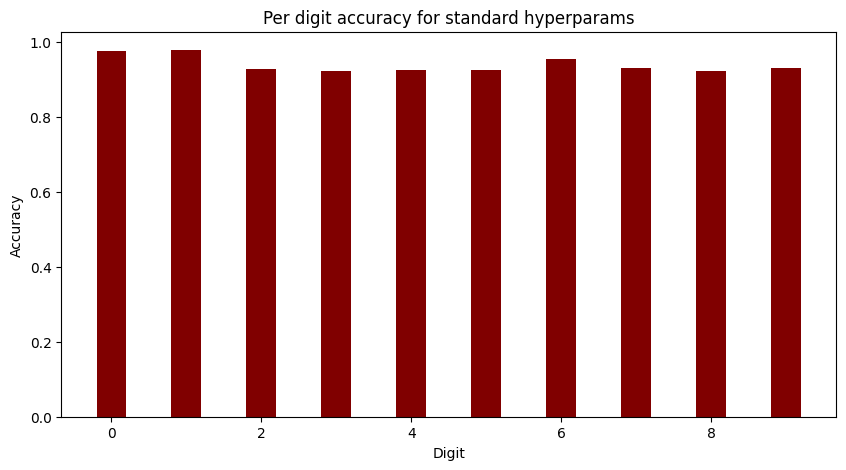

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 5))
 # creating the bar plot
plt.bar(range(0,10), accuracies, color ='maroon',
        width = 0.4)
plt.xlabel("Digit")
plt.ylabel("Accuracy")
plt.title("Per digit accuracy for standard hyperparams")
plt.show()

In [ ]:
print(np.shape(net.weights[0]))
print(net.weights[0])

(30, 784)
[[ 0.45745312 -0.43668441  0.06388325 ... -0.01876614  0.69747384
   1.75032045]
 [ 0.31008606 -1.31462574 -0.95998785 ...  2.07556124 -0.23319521
  -0.5521895 ]
 [ 2.62684071  0.59619412  0.75105954 ...  0.39065436  0.21883096
  -0.15008028]
 ...
 [ 0.12553374  1.12652397 -0.19640291 ... -1.06957326 -0.38014393
   2.12662076]
 [-0.33401933 -0.27315002 -0.64691649 ...  0.57483904 -1.0439243
  -0.26700133]
 [-2.64108907  0.69231545 -1.57468679 ... -0.20718688  0.5363602
   0.16273624]]


In [ ]:
print(np.shape(net.weights[1]))
print(net.weights[1])

(10, 30)
[[ 8.92742895e-02 -9.53000886e-01 -4.57105149e-01  8.12327680e-01
  -1.66712716e+00 -3.52723344e+00  2.43366417e+00 -1.17334118e+00
   8.58573096e-01 -6.38617216e-01 -3.98845904e+00  2.60882754e+00
  -3.45033814e+00 -4.68697776e+00 -2.93102636e-02 -2.10035207e+00
  -1.34230789e+00 -6.94064697e-01 -1.19457306e+00 -2.29509311e+00
   3.69451831e+00 -5.47055566e-01  2.43794816e+00 -1.72272752e+00
   2.40744671e-01  1.47444250e+00 -1.05438717e+00 -1.86542911e+00
  -1.06224867e-01 -2.56395561e+00]
 [-7.34977609e-01  4.91942640e+00 -1.66675986e+00  1.59401840e+00
  -2.16068409e+00 -1.51479916e+00 -1.24537721e+00 -1.68016775e+00
   3.37529651e+00 -2.55192130e-01 -6.61492715e-01 -1.81183859e+00
   1.68476200e+00 -3.24190509e-01  1.90014317e+00  1.24494728e+00
  -4.40024242e+00 -1.63853095e+00 -2.36185595e+00 -8.24469577e-01
  -1.22617148e+00 -2.62641360e-01 -3.39598402e+00  1.40744340e+00
  -1.83806995e+00 -7.40020693e-01 -1.30620128e+00  1.84904317e+00
  -2.15747635e+00  7.20940625e-0

In [ ]:
# part 3 - experiment with different hyper parameters
#  epochs - 5, 15, 30, 60 (batch size 10, learning 3.0)
#  batch - 5, 10, 50, 100 (epochs 30, learning 3.0)
#  learning rate - 1.0, 3.0, 5.0 (epochs 30, batch size 10)